## Concept Questions
### **How does routing work in Flask?**
Routing in Flask maps URL patterns to Python functions (called view functions). When a user visits a URL, Flask matches it to a route decorator and executes the corresponding function.  

Flask supports:  
- Static routes: `/about`, `/contact`     
- Dynamic routes: `/users/<id>`, `/posts/<slug>`     
- Type converters: `<int:id>`, `<string:name>`, `<path:subpath>`    
- Multiple HTTP methods: `@app.route('/login', methods=['GET', 'POST'])`  

### **What is restful service**
REST (Representational State Transfer) is an architectural style for building web services that use HTTP methods to perform operations on resources.   
A RESTful service follows these principles:

- **Resources**: Everything is a resource (users, products, orders) identified by URLs
- **HTTP Methods**: Use standard methods for CRUD operations
  - GET: Read/retrieve
  - POST: Create
  - PUT/PATCH: Update
  - DELETE: Delete
- **Stateless**: Each request contains all necessary information
- **Uniform Interface**: Consistent URL structure and response format (usually JSON)

Example:      
```text
GET /api/products          # Get all products
GET /api/products/5        # Get product with ID 5
POST /api/products         # Create new product
PUT /api/products/5        # Update product 5
DELETE /api/products/5     # Delete product 5
```

### **What are the categories of HTTP status codes (1xx, 2xx, 3xx, 4xx, 5xx)? Provide examples for each.**
**1xx (Informational)**: Request received, continuing process
- 100 Continue: Server received headers, client should send body
- 101 Switching Protocols: Server switching to protocol requested by client

**2xx (Success)**: Request successfully received and processed
- 200 OK: Standard success response
- 201 Created: New resource created successfully
- 204 No Content: Success but no content to return

**3xx (Redirection)**: Further action needed to complete request
- 301 Moved Permanently: Resource permanently moved to new URL
- 302 Found: Temporary redirect
- 304 Not Modified: Cached version is still valid

**4xx (Client Error)**: Client made an error in the request
- 400 Bad Request: Invalid syntax or malformed request
- 401 Unauthorized: Authentication required
- 403 Forbidden: Server understood but refuses to authorize
- 404 Not Found: Resource doesn't exist
- 422 Unprocessable Entity: Validation errors

**5xx (Server Error)**: Server failed to fulfill valid request
- 500 Internal Server Error: Generic server error
- 502 Bad Gateway: Invalid response from upstream server
- 503 Service Unavailable: Server temporarily overloaded or down

### **What is HTTP and how does it work**
HTTP (HyperText Transfer Protocol) is the foundation of data communication on the web. It's a request-response protocol between clients and servers.

**How it works:**

  1. **Client sends request** containing:
     - Method (GET, POST, etc.)
     - URL/path
     - Headers (metadata like content-type, authentication)
     - Body (optional, for POST/PUT)

  2. **Server processes request** and sends response containing:
     - Status code (200, 404, etc.)
     - Headers (content-type, cache info, etc.)
     - Body (HTML, JSON, etc.)

  **Example request:**
  ```text
  GET /api/products HTTP/1.1
  Host: example.com
  Accept: application/json
  ```

  **Example response:**
  ```text
  HTTP/1.1 200 OK
  Content-Type: application/json

  {"id": 1, "name": "Laptop"}
  ```

### **Explain the concept of idempotency in HTTP methods**
Idempotency(/ai'dempətəns,-tənsi/) means **making the same request multiple times produces the same result** as making it once. The state of the server remains identical after one or multiple identical requests.   

Idempotent methods:    

- GET: Reading data multiple times doesn't change anything
- PUT: Updating a resource to the same value multiple times has the same effect
- DELETE: Deleting an already-deleted resource still results in it being deleted
- HEAD, OPTIONS, TRACE: Also idempotent

Non-idempotent methods:  

- POST: Creating a resource multiple times creates multiple resources
  - POST /orders → creates order 1   
  - POST /orders → creates order 2 (different result!)     

### **Explain the difference between HTTP and HTTPS**
**HTTP (HyperText Transfer Protocol)**
- Data transmitted in plain text
- Vulnerable to eavesdropping and man-in-the-middle attacks
- Port 80
- Fast (no encryption overhead)
- No authentication of server identity

**HTTPS (HTTP Secure)**
- Data encrypted using TLS/SSL
- Protects against eavesdropping, tampering, and forgery
- Port 443
- Slightly slower due to encryption
- Authenticates server identity with certificates
- Required for sensitive data (passwords, credit cards, personal info)

**How HTTPS works:**
1. Client initiates connection
2. Server sends SSL certificate
3. Client verifies certificate with Certificate Authority
4. They establish encrypted connection using public/private keys
5. All data is encrypted in transit

**Visual difference:**
- HTTP: `http://example.com` ⚠️ Not Secure
- HTTPS: `https://example.com` 🔒 Secure

### **Design a RESTful API for a blogging platform**
**Users**
```text
POST   /api/users              # Register new user
GET    /api/users/{id}         # Get user profile
PUT    /api/users/{id}         # Update user profile
DELETE /api/users/{id}         # Delete user account
```

**Authentication**
```text
POST   /api/auth/login         # Login
POST   /api/auth/logout        # Logout
POST   /api/auth/refresh       # Refresh token
```

**Posts**
```text
GET    /api/posts              # Get all posts (with pagination)
GET    /api/posts/{id}         # Get single post
POST   /api/posts              # Create new post
PUT    /api/posts/{id}         # Update post
DELETE /api/posts/{id}         # Delete post
GET    /api/users/{id}/posts   # Get posts by specific user
```

**Comments**
```text
GET    /api/posts/{id}/comments       # Get comments for a post
POST   /api/posts/{id}/comments       # Add comment to post
PUT    /api/comments/{id}             # Update comment
DELETE /api/comments/{id}             # Delete comment
```

**Categories/Tags**
```text
GET    /api/categories                # Get all categories
GET    /api/categories/{id}/posts     # Get posts in category
GET    /api/tags                      # Get all tags
GET    /api/tags/{tag}/posts          # Get posts with specific tag
```

**Query parameters for filtering/pagination:**
```text
GET /api/posts?page=2&limit=10&sort=created_at&order=desc
GET /api/posts?author=5&category=tech&status=published
```

### **What is the MVC architecture**
MVC (Model-View-Controller) is a design pattern that separates an application into three interconnected components:

  Model

  - Represents data and business logic
  - Manages database operations (CRUD)
  - Contains data validation rules
  - Independent of user interface

  View

  - Presents data to users (UI layer)
  - Templates, HTML, JSON responses
  - Receives data from Controller
  - No business logic

  Controller

  - Handles user requests and input
  - Coordinates between Model and View
  - Contains application flow logic
  - Routes requests to appropriate handlers

Benefits:

- Separation of concerns
- Easier testing and maintenance
- Multiple developers can work simultaneously
- Reusable components

### **What are Flask's request objects**
contains all information about the incoming HTTP request. It's a global object available in view functions.

Common attributes and methods:
- Request data:
  ```python
  from flask import request

  request.method          # HTTP method: 'GET', 'POST', etc.
  request.url            # Full URL
  request.path           # Just the path: '/products/5'
  request.host           # Domain: 'example.com'
  ```

- Query parameters (URL parameters):
  
  ```python
  # URL: /search?q=laptop&price=500
  request.args.get('q')           # 'laptop'
  request.args.get('price')       # '500'
  request.args.get('page', 1)     # Default value if not present
  ```

- Form data (POST requests):
  ```python
  request.form.get('username')
  request.form.get('password')
  ```

- JSON data:
  ```python
  data = request.get_json()       # Parses JSON body
  username = data.get('username')
  ```
- Headers:
  ```python
  request.headers.get('Content-Type')
  request.headers.get('Authorization')
  ```
- Files:
  ```python
  file = request.files.get('upload')
  if file:
      file.save('/uploads/' + file.filename)
  ```
- Cookies:
  ```python
  session_id = request.cookies.get('session_id')
  ```

## Coding Challenge:
Create a complete RESTful API for the Customer & Orders model.

```text
GET    /api/customers           # Get all customers
GET    /api/customers/<id>      # Get single customer
POST   /api/customers           # Create new customer
PUT    /api/customers/<id>      # Update customer
DELETE /api/customers/<id>      # Delete customer
```

**Customer fields:**
- `id` (Integer, primary key)
- `name` (String, required)
- `email` (String, required, unique)
- `created_at` (DateTime)

```text
GET    /api/orders              # Get all orders
GET    /api/orders/<id>         # Get single order
POST   /api/orders              # Create order
PUT    /api/orders/<id>         # Update order
DELETE /api/orders/<id>         # Delete order
```

**Order fields:**
- `id` (Integer, primary key)
- `customer_id` (Integer, foreign key to customers)
- `order_date` (DateTime)
- `total_amount` (Numeric)
- `status` (String, default='pending')

## Requirements
1. Validate required fields
2. Return proper HTTP status codes (200, 201, 404, 400, 500)

In [1]:
!python ecommerce_restful_blueprint.py

 * Serving Flask app 'restful_service_updated'
 * Debug mode: on
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 911-286-736
127.0.0.1 - - [19/Nov/2025 14:52:10] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Nov/2025 14:52:32] "GET /api/customers HTTP/1.1" 200 -
127.0.0.1 - - [19/Nov/2025 14:52:57] "GET /api/customers/1 HTTP/1.1" 404 -
127.0.0.1 - - [19/Nov/2025 14:53:06] "POST /api/customers HTTP/1.1" 500 -
127.0.0.1 - - [19/Nov/2025 14:55:30] "POST /api/customers HTTP/1.1" 201 -
127.0.0.1 - - [19/Nov/2025 14:58:06] "GET /api/customers/1 HTTP/1.1" 200 -
127.0.0.1 - - [19/Nov/2025 14:58:29] "PUT /api/customers/1 HTTP/1.1" 200 -
127.0.0.1 - - [19/Nov/2025 14:59:19] "GET /api/customers/1 HTTP/1.1" 200 -
127.0.0.1 - - [19/Nov/2025 15:00:32] "DELETE /api/customers/1 HTTP/1.1" 500 -
127.0.0.1 - - [19/Nov/2025 15:00:46] "GET /api/customers/1 HTTP/1.1" 200 -
127.0.0.1 - - [19/Nov/2025 15:01:25] "DELETE /api/customers/1 HTTP/1

create customer:
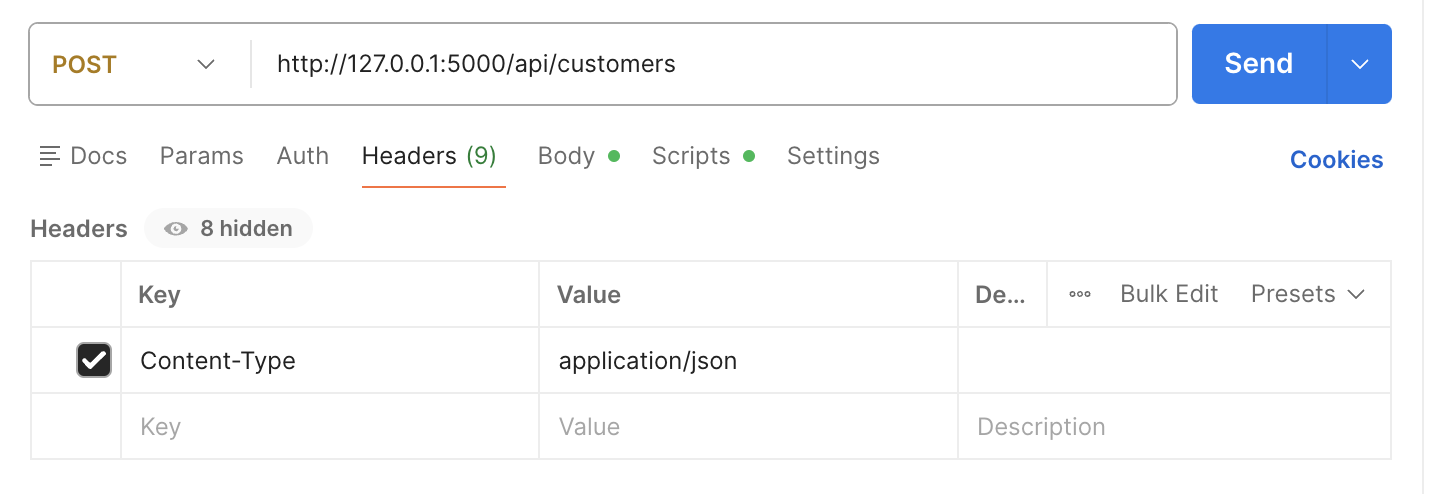
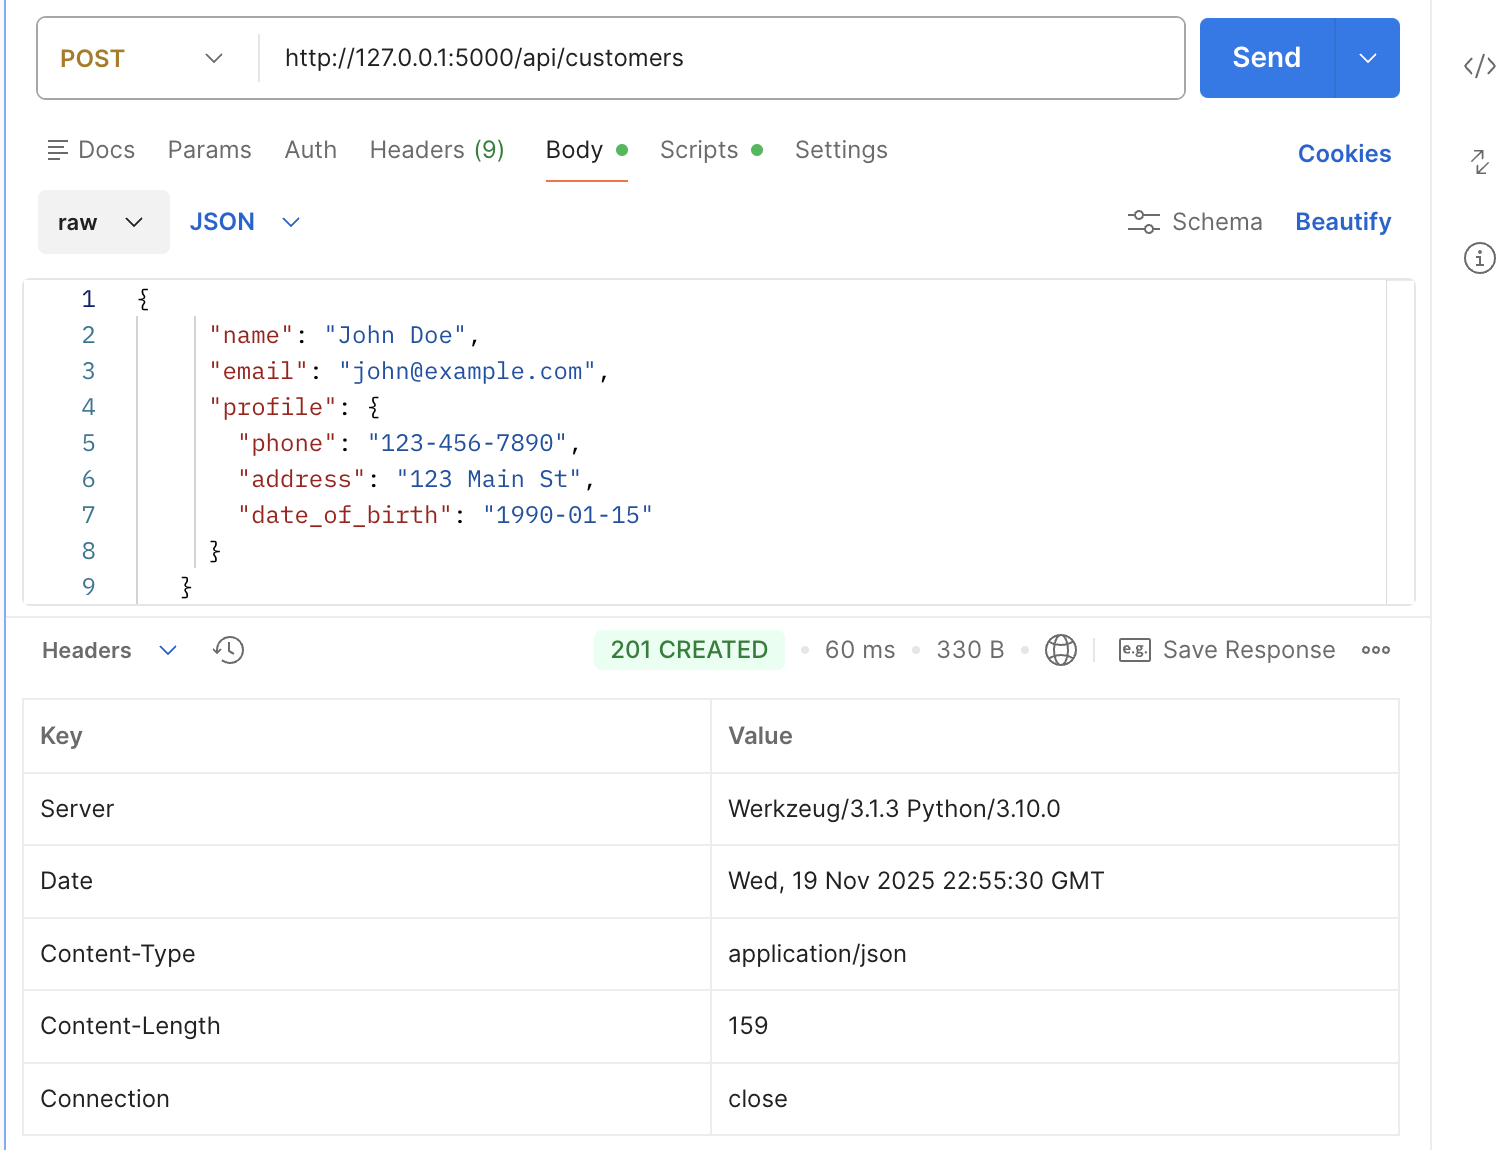
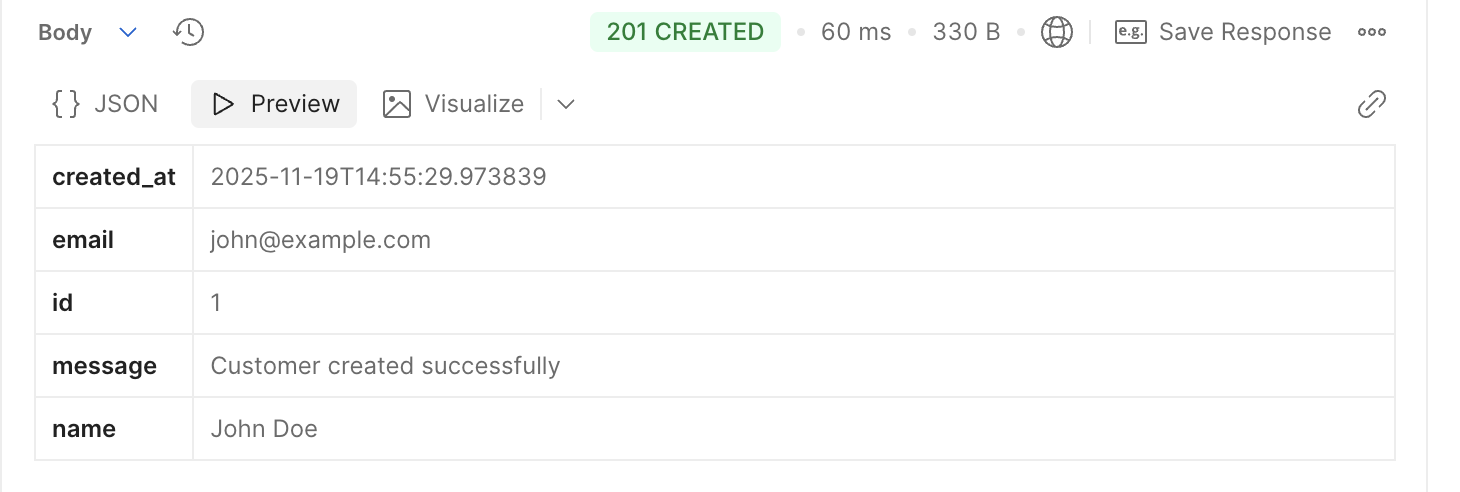

update customer's birth year to 1999:
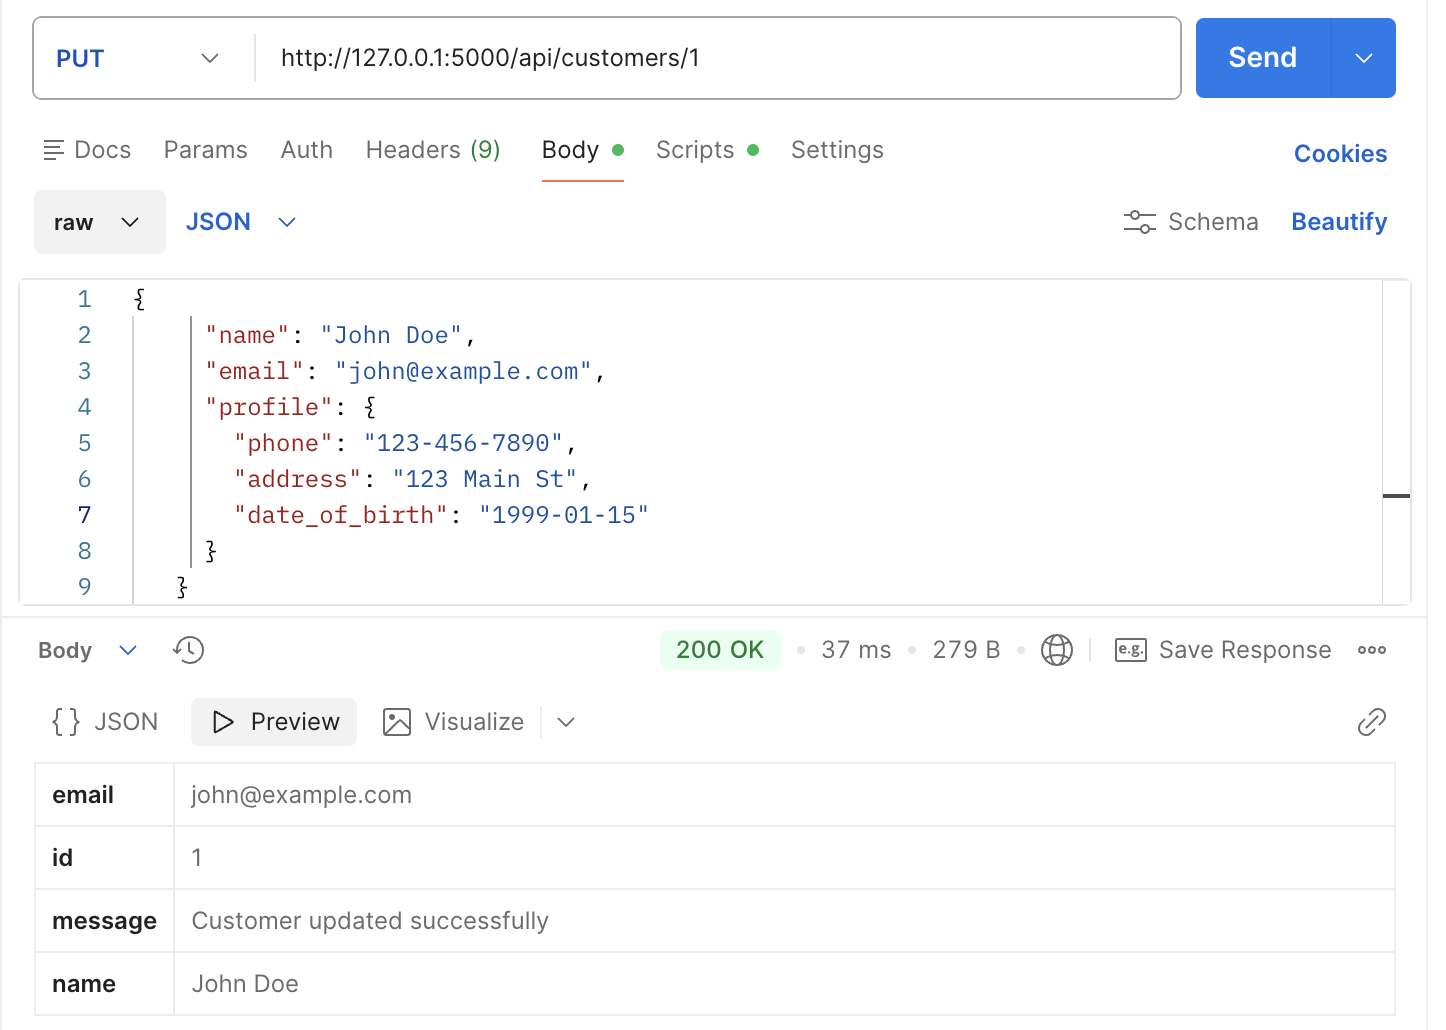

get his info:
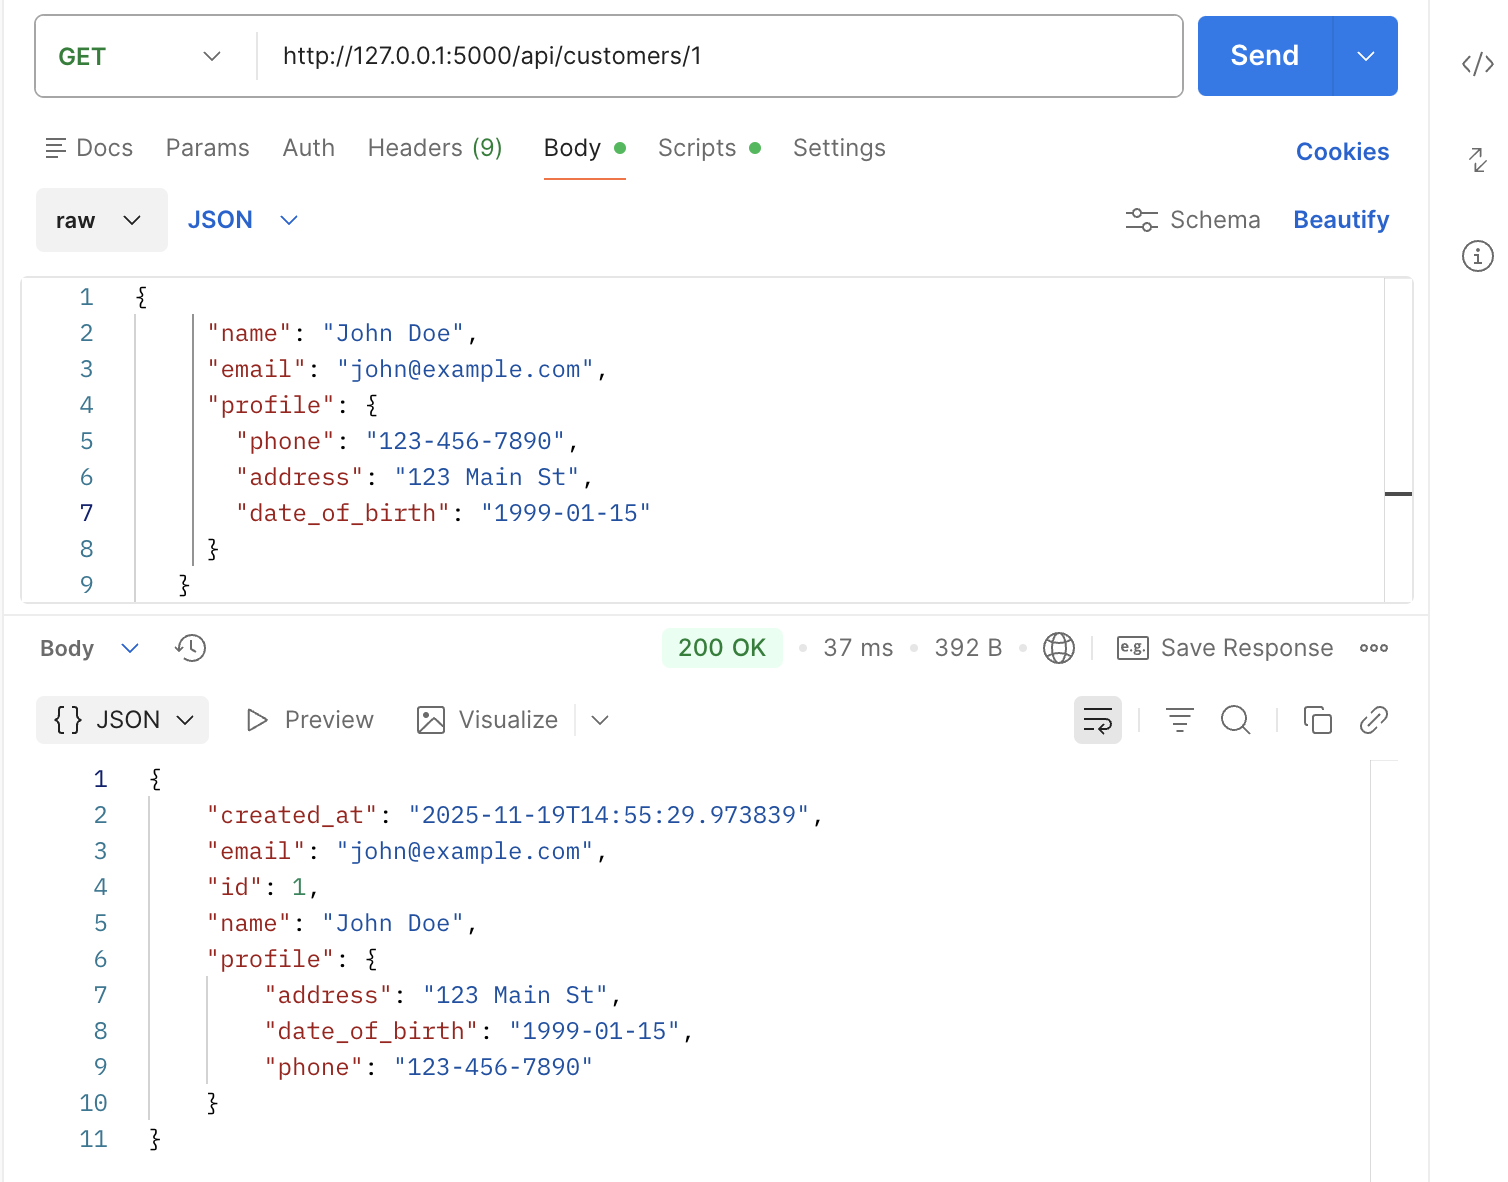
